In [1]:
import matplotlib.pyplot as plt
import numpy as np

### pyplot简介

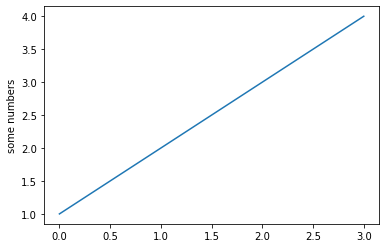

In [2]:
plt.plot([1, 2, 3, 4]) # x轴默认是[0, 1, 2, 3]
plt.ylabel('some numbers')
plt.show()

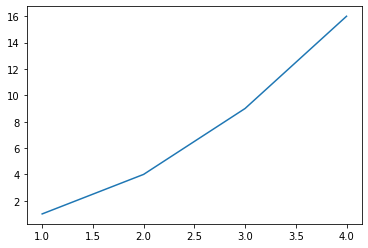

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

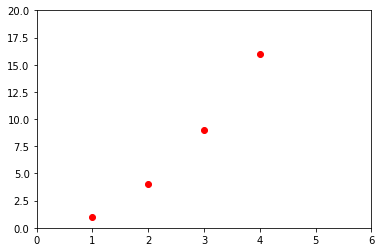

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # 'ro'表示红色圆点，默认是'b-'表示蓝色的直线
plt.axis([0, 6, 0, 20]) # 指定x轴[0,6]，y轴[0,20]
plt.show()

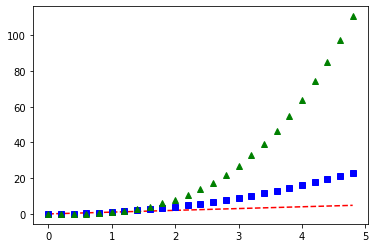

In [5]:
# 0~5之间，每隔0.2平均采样
t = np.arange(0., 5., 0.2)

# t, t, 'r--' 红虚线, t, t**2, 'bs'蓝方块，t, t**3, 'g^'绿三角
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### 使用keywords字符串绘制

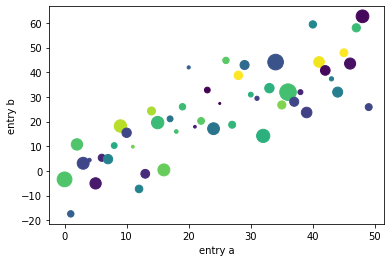

In [6]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # c:颜色 s:大小
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### 使用分类变量绘制

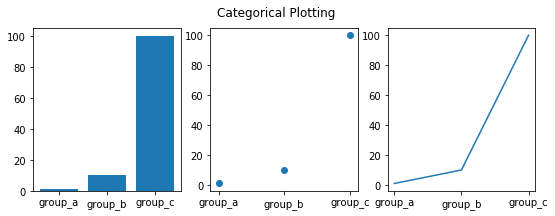

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### 控制线的属性

In [8]:
x = np.linspace(0, 2, 100)
y = x ** 2

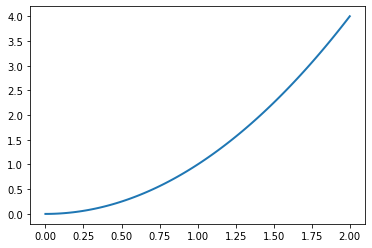

In [9]:
plt.plot(x, y, linewidth=2.0) # 设定线宽
plt.show()

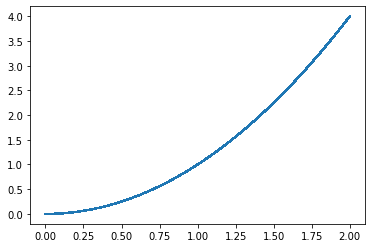

In [10]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿
plt.show()

使用setp方法设定artist的属性

In [11]:
x1 = np.linspace(0, 2, 100)
y1 = x ** 2
x2 = np.linspace(0, 2, 100)
y2 = x ** 3

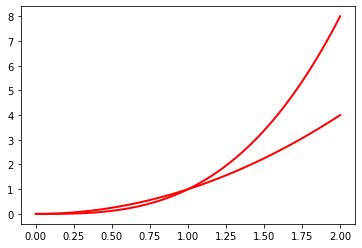

In [12]:
lines = plt.plot(x1, y1, x2, y2)
plt.setp(lines, color='r', linewidth=2.0) # 用keyword args设定颜色、线宽
plt.show()

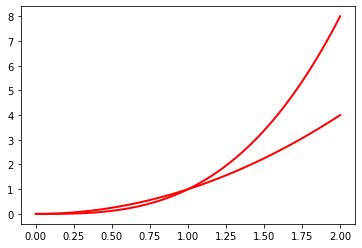

In [13]:
lines = plt.plot(x1, y1, x2, y2)
plt.setp(lines, 'color', 'r', 'linewidth', 2.0) # 用matlab风格的字符串对设定颜色、线宽
plt.show()

In [14]:
plt.setp(lines) # 显示所有属性

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

### 使用多个figures和axes

pyplot有当前figure和当前axes的概念。所有的绘制指令都应用在当前axes上。  
gca()返回当前axes，gcf()返回当前figure。

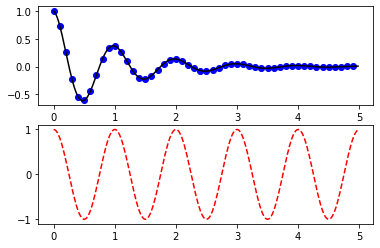

In [15]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure() # 切换当前figure，默认是figure(1),subplot(111)
plt.subplot(211) # 切换当前axes，(numrows, numcols, plot_number)，plot_number:range(1，numrows*numcols)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k') # 'bo'表示蓝色圆点，'k'表示黑线

plt.subplot(212) # 切换当前axes，括号里的三个数值都小于10时，逗号可以省略
plt.plot(t2, np.cos(2*np.pi*t2), 'r--') # 'r--'表示红色虚线

plt.show()

创建多个figures

D:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


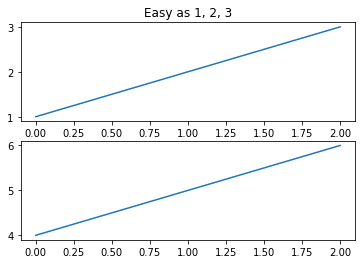

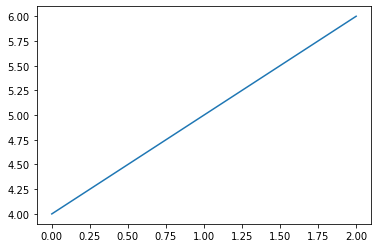

In [16]:
plt.figure(1)                # 1号figure
plt.subplot(211)             # 1号figure的第1个subplot211
plt.plot([1, 2, 3])
plt.subplot(212)             # 1号figure的第2个subplot212
plt.plot([4, 5, 6])

plt.figure(2)                # 2号figure，默认创建subplot(111)
plt.plot([4, 5, 6])

plt.figure(1)                # 切换回1号figure，此时当前subplot2仍是第2个subplot212
plt.subplot(211)             # 切换回第1个subplot211
plt.title('Easy as 1, 2, 3') # 设置第1个subplot211的标题

plt.show()

使用clf()清除当前figure，使用cla()清除当前axes。

### 使用文字

使用text()方法将文字添加在任意位置, 使用xlabel()、 ylabel()、title()在指定位置添加文字。

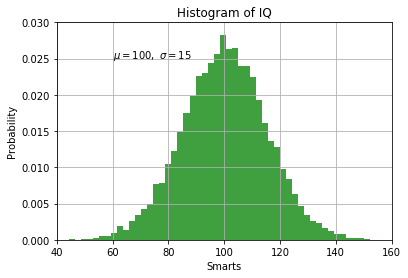

In [17]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) # 正态分布

# 数据直方图
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # 在x=60,y=0.025的位置添加文字
plt.axis([40, 160, 0, 0.03]) # 设定x轴范围[40,160]，y轴范围[0,0.03]
plt.grid(True) # 显示网格
plt.show()

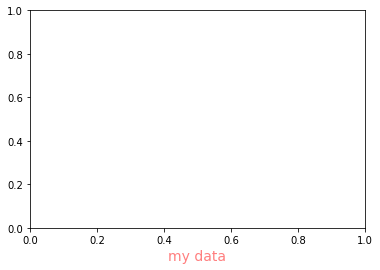

In [18]:
t = plt.xlabel('my data', fontsize=14, color='red') # 储存artist对象
plt.setp(t, alpha=0.5) # 使用setp方法设定xlabel的属性
plt.show()

使用数学表达式

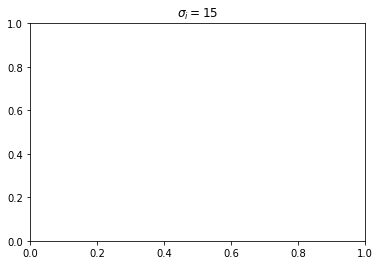

In [19]:
plt.title(r'$\sigma_i=15$') # 使用TeX表达式
plt.show()

文字注释

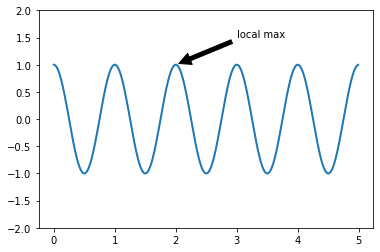

In [20]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

# xy=箭头指向坐标，xytext=文字注释坐标
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

### 对数坐标轴和其他非线性坐标轴

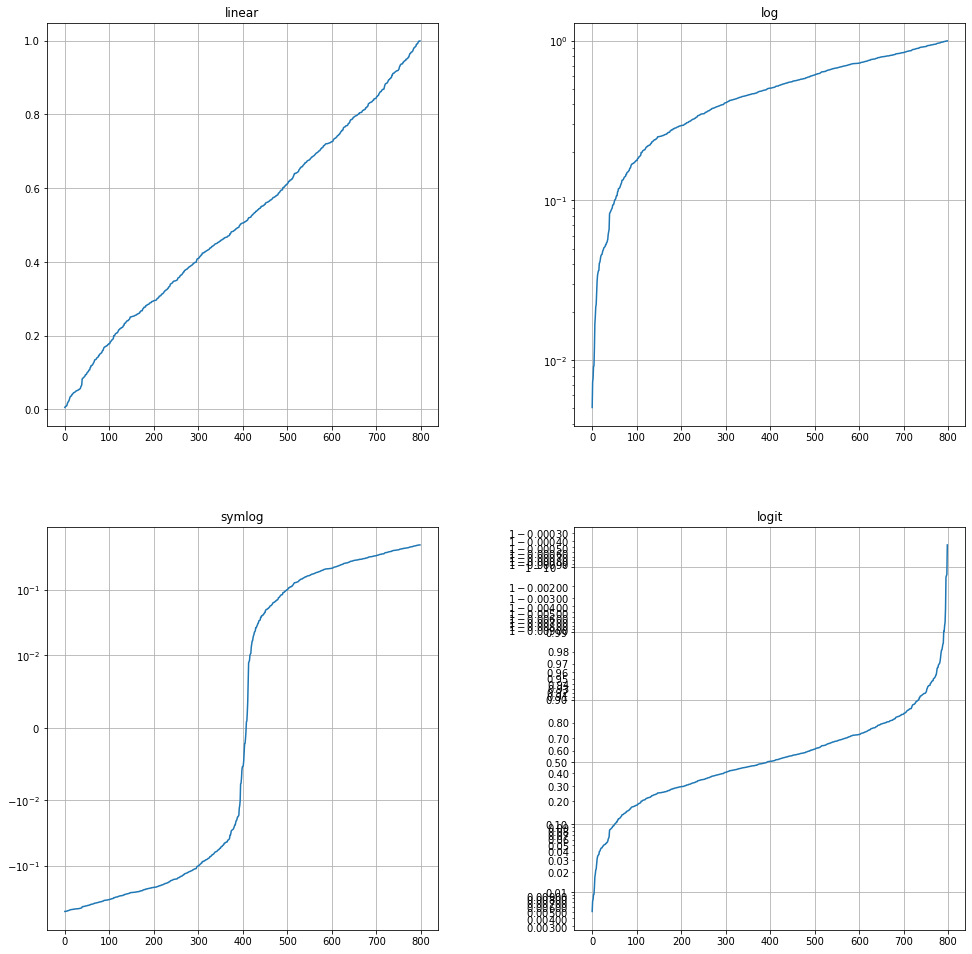

In [21]:
from matplotlib.ticker import NullFormatter  # `logit` scale需要用到

# 固定随机数种子
np.random.seed(19680801)

# 生成一些(0,1)开区间的数据
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# 用不同的scale绘制同一组数据
plt.figure(figsize=(15,15))

# 线性y轴
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# 对数y轴
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log y轴
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit y轴
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()